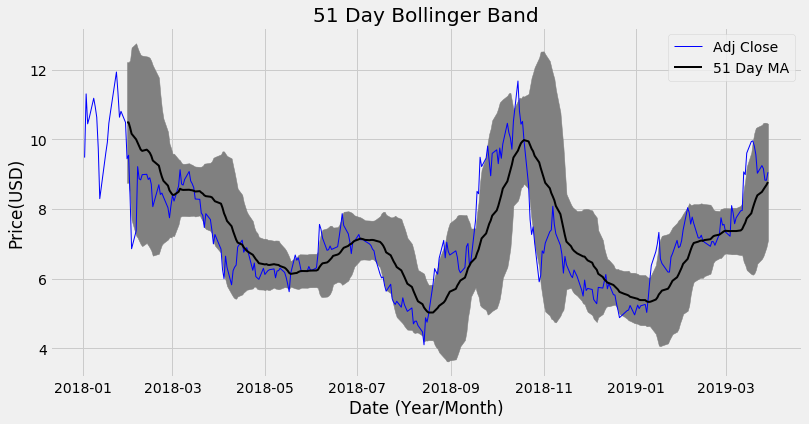

In [31]:
# import  libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

# Get Adjusted Closing Prices
fb = get_adj_close('acb', '1/1/2018', '31/03/2019')

tesla = get_adj_close('f', '1/2/2016', '31/12/2018')
amazon = get_adj_close('f', '1/2/2016', '31/12/2018')

# Calculate Moving Average, Std Deviation, Upper Band and Lower Band
for item in (fb, tesla, amazon):
    item['51 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    item['51 Day STD'] = item['Adj Close'].rolling(window=20).std()
    item['Upper Band'] = item['51 Day MA'] + (item['51 Day STD'] * 2)
    item['Lower Band'] = item['51 Day MA'] - (item['51 Day STD'] * 2)

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis
x_axis = fb.index.get_level_values(0)

# Plot shaded Bollinger Band 
ax.fill_between(x_axis, fb['Upper Band'], fb['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, fb['Adj Close'], color='blue', lw=1)
ax.plot(x_axis, fb['51 Day MA'], color='black', lw=2)

# Show the Image
ax.set_title('51 Day Bollinger Band')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();